In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from "merged_training.pkl"
df = pd.read_pickle("merged_training.pkl")

# Encode the emotion labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['emotions_encoded'] = label_encoder.fit_transform(df['emotions'])

# Split the data into train and test sets
X = df['text']
y = df['emotions_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of emotion labels for later decoding
emotions = list(label_encoder.classes_)

First 5 rows of the dataset:
                                                     text emotions
27383   i feel awful about it too because it s my job ...  sadness
110083                              im alone i feel awful  sadness
140764  ive probably mentioned this before but i reall...      joy
100071           i was feeling a little low few days back  sadness
2837    i beleive that i am much more sensitive to oth...     love
Summary statistics of the dataset:
                                                 text emotions
count                                          416809   416809
unique                                         393822        6
top     i feel more adventurous willing to take risks      joy
freq                                               16   141067


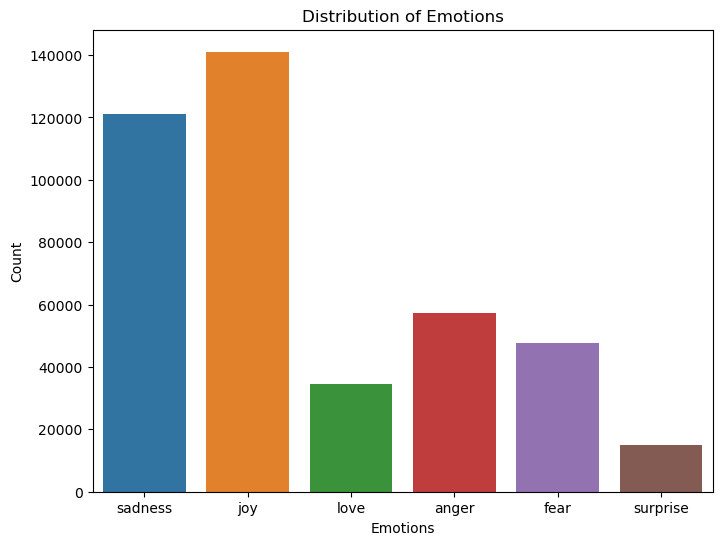

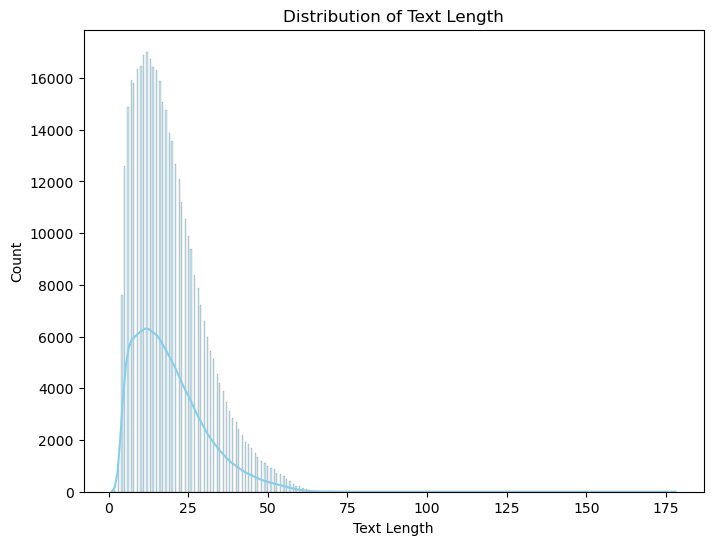

d:\Abhishek\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


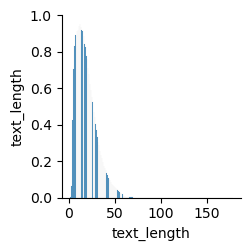

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_pickle("merged_training.pkl")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Summary statistics of the dataset
print("Summary statistics of the dataset:")
print(df.describe())

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='emotions', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

# Plotting the length of the text
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Pairplot (for numerical data only)
sns.pairplot(numerical_df)
plt.show()


RAN BERT BUT TOO EXPENSIVE

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

# Load the data from "merged_training.pkl"
df = pd.read_pickle("merged_training.pkl")

# Encode the emotion labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['emotions_encoded'] = label_encoder.fit_transform(df['emotions'])

# Split the data into train and test sets
X = df['text']
y = df['emotions_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of emotion labels for later decoding
emotions = list(label_encoder.classes_)

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
max_length = 128  # Define the maximum sequence length
X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False, return_attention_mask=True)
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False, return_attention_mask=True)

# Convert the emotion labels to categorical format
num_classes = len(emotions)

# Load the pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(
    X_train_tokens.data,
    y_train,
    validation_data=(X_test_tokens.data, y_test),
    epochs=3,
    batch_size=32
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tokens.data, y_test, batch_size=32)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Save the model
model.save_pretrained('emotion_model')



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
  281/10421 [..............................] - ETA: 598:19:24 - loss: 0.7393 - accuracy: 0.7467

OTHER MODELS HAVE BEEN TRAINED IN THEIR RESPECTIVE FILES ALONG WITH VALIDATION